<a href="https://colab.research.google.com/github/Manas2001Agarwal/DATA_SCIENCE_PROJECTS_PORTFOLIO/blob/main/Logistic_Regression/One_vs_Rest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drug200.csv")
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


Content:- Trying some techniques to predict the outcome of the drugs that might be accurate for the patient. 

The target feature is:
* Drug type

The feature sets are:
* Age
* Sex
* Blood Pressure Levels (BP)
* Cholesterol Levels
* Na to Potassium Ration


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
data.shape

(200, 6)

We see that we have a small dataset over here and fortunately no null values

The next step is to encode all categorical features

In [ ]:
df1 = pd.get_dummies(data = data,columns = ['Sex'],drop_first = True)['Sex_M']
data = pd.concat([df1,data],axis=1)
data.drop('Sex',axis=1,inplace = True)
data.head()

,Sex_M,Age,BP,Cholesterol,Na_to_K,Drug
0,0,23,HIGH,HIGH,25.355,DrugY
1,1,47,LOW,HIGH,13.093,drugC
2,1,47,LOW,HIGH,10.114,drugC
3,0,28,NORMAL,HIGH,7.798,drugX
4,0,61,LOW,HIGH,18.043,DrugY


In [ ]:
data['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [ ]:
dict_1 = {'LOW':0,'NORMAL':1,'HIGH':2}

data['BP'] = data['BP'].map(dict_1)
data.head()

,Sex_M,Age,BP,Cholesterol,Na_to_K,Drug
0,0,23,2,HIGH,25.355,DrugY
1,1,47,0,HIGH,13.093,drugC
2,1,47,0,HIGH,10.114,drugC
3,0,28,1,HIGH,7.798,drugX
4,0,61,0,HIGH,18.043,DrugY


In [ ]:
data['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [ ]:
dict_2 = {'NORMAL':0,'HIGH':1}

In [ ]:
data['Cholesterol'] = data['Cholesterol'].map(dict_2)
data.head()

,Sex_M,Age,BP,Cholesterol,Na_to_K,Drug
0,0,23,2,1,25.355,DrugY
1,1,47,0,1,13.093,drugC
2,1,47,0,1,10.114,drugC
3,0,28,1,1,7.798,drugX
4,0,61,0,1,18.043,DrugY


Splitting the dataset into Dependent and Independent Variables

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
X.head()

,Sex_M,Age,BP,Cholesterol,Na_to_K
0,0,23,2,1,25.355
1,1,47,0,1,13.093
2,1,47,0,1,10.114
3,0,28,1,1,7.798
4,0,61,0,1,18.043


In [ ]:
y.head()

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

lb = lb.fit(y)

y_dense = lb.transform(y)

In [ ]:
lb.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype='<U5')

In [ ]:
y_dense = pd.DataFrame(y_dense,columns = ['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'])
y_dense.head()

,DrugY,drugA,drugB,drugC,drugX
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,1
4,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_dense, test_size=0.20, random_state=22)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
model = LogisticRegression()
clf = OneVsRestClassifier(model)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(y_pred)

[[0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 1]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 1 1]]


In [ ]:
y_pred_proba = clf.predict_proba(X_test)
print(y_pred_proba)

[[2.87539403e-06 7.21588607e-01 7.84319176e-02 1.16908803e-02
  1.94552261e-01]
 [9.99999998e-01 4.05625738e-06 1.95982171e-04 2.10802782e-02
  1.04550464e-02]
 [1.25108986e-04 9.25481895e-04 1.35803648e-03 1.12230648e-01
  7.52366039e-01]
 [1.00000000e+00 6.92699256e-05 9.27603973e-06 2.51387697e-07
  4.30471224e-05]
 [1.00000000e+00 1.45243803e-03 5.46646119e-05 2.80671463e-06
  1.00746281e-03]
 [1.78384553e-02 6.62267534e-01 2.40464416e-03 5.21667983e-03
  9.47682553e-02]
 [6.92598996e-01 1.35946397e-01 1.98343870e-02 1.74166823e-04
  8.68080511e-02]
 [7.69105796e-03 4.86264729e-02 8.20186013e-04 6.93393191e-02
  2.40418020e-01]
 [3.83745627e-03 1.80330960e-01 1.53899593e-01 3.70136394e-04
  2.97870585e-01]
 [9.99999689e-01 5.39123170e-05 6.01039322e-06 6.67514627e-03
  6.99019078e-02]
 [9.99999735e-01 2.40034421e-03 9.74486416e-02 1.65896745e-05
  1.02509448e-02]
 [2.40931117e-05 4.44589885e-01 1.36567819e-01 7.54043509e-04
  3.57532089e-01]
 [1.00000000e+00 1.62021924e-03 7.006429

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, fbeta_score
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay

[]

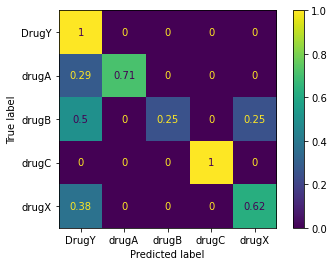

In [ ]:
cm = confusion_matrix(lb.inverse_transform(y_test.to_numpy()),lb.inverse_transform(y_pred),normalize = 'true')
ConfusionMatrixDisplay(cm,display_labels =  ['DrugY', 'drugA', 'drugB', 'drugC', 'drugX']).plot()
plt.plot()

In [ ]:
print("Model Accuracy is: - ", accuracy_score(lb.inverse_transform(y_test.to_numpy()),lb.inverse_transform(y_pred)) * 100, "%")

Model Accuracy is: -  80.0 %


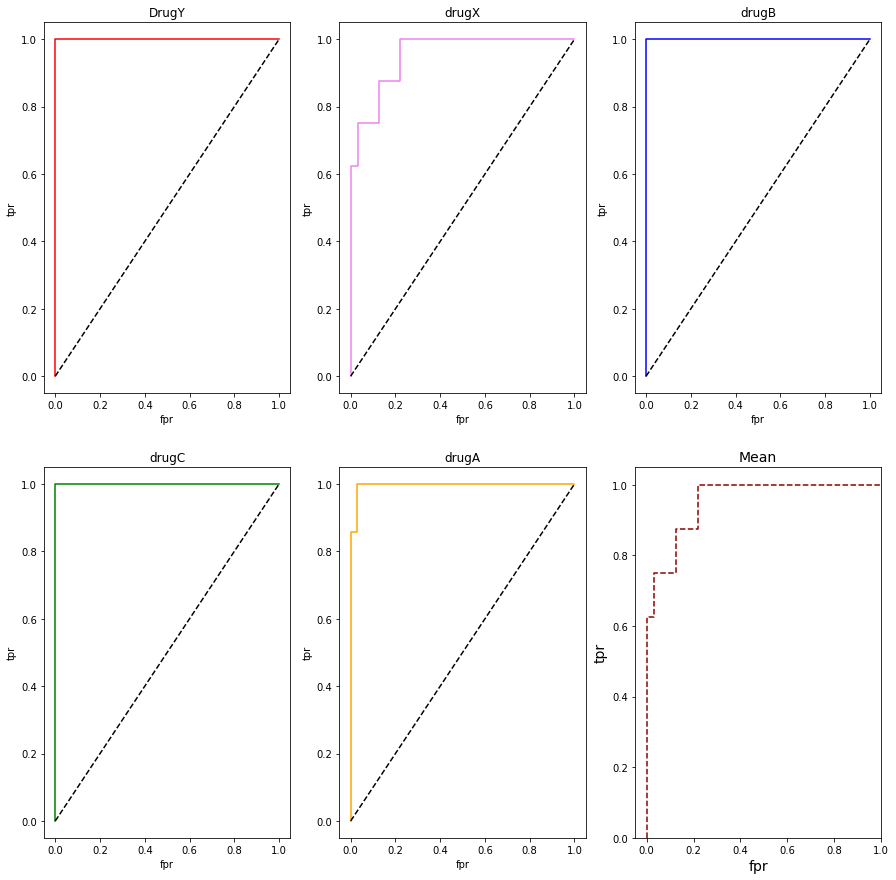

In [ ]:
%matplotlib inline
color = ['red','orange','blue','green','violet']
labels =  ['DrugY', 'drugA', 'drugB', 'drugC', 'drugX']
fig, ax = plt.subplots(2,3)
fig.set_figheight(15)
fig.set_figwidth(15)
fpr_mean = []
tpr_mean = []

for i in clf.classes_:

  fpr,tpr,thr = roc_curve(y_test.to_numpy()[:,i], y_pred_proba[:,i])
  ax[(i)%2,(i)%3].plot(fpr,tpr,color = color[i])
  ax[i%2,(i)%3].plot([0,1],[0,1],'k--',color = 'black')
  ax[i%2,(i)%3].set_title(labels[i])
  ax[i%2,(i)%3].set(xlabel = 'fpr',ylabel='tpr')

  fpr_mean.append(fpr.mean())
  tpr_mean.append(tpr.mean())

ax[1,2].plot(fpr,tpr,'k--',color = 'darkred')

plt.xlim(-0.05,1)
plt.ylim(0,1.05)  
plt.xlabel('fpr',fontsize = 14)
plt.ylabel('tpr',fontsize = 14)
plt.title('Mean',fontsize = 14)
plt.show()

In [ ]:
print(classification_report(lb.inverse_transform(y_test.to_numpy()),lb.inverse_transform(y_pred)))

              precision    recall  f1-score   support

       DrugY       0.74      1.00      0.85        20
       drugA       1.00      0.71      0.83         7
       drugB       1.00      0.25      0.40         4
       drugC       1.00      1.00      1.00         1
       drugX       0.83      0.62      0.71         8

    accuracy                           0.80        40
   macro avg       0.91      0.72      0.76        40
weighted avg       0.84      0.80      0.78        40



In [ ]:
print(fbeta_score(lb.inverse_transform(y_test.to_numpy()),lb.inverse_transform(y_pred),beta=1,average = 'macro'))

0.7597365754812564


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10)

clf_cv = cross_val_score(clf,X,y,scoring = 'accuracy',cv = cv, verbose = 2)

print(clf_cv)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[1.   0.9  0.9  0.9  0.9  0.9  0.9  0.85 0.9  1.  ]


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.3s finished


In [ ]:
print(clf_cv)

[1.   0.9  0.9  0.9  0.9  0.9  0.9  0.85 0.9  1.  ]


In [ ]:
print(clf_cv.mean())

0.915


**Mean Accuracy obtained after CROSS VALIDATION is 0.915**

**GRID SEARCH CV**

In [ ]:
param_grid = {'estimator__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'estimator__penalty': ['l1', 'l2', 'elasticnet', 'none'],
             'estimator__C' : [0.01,0.1,0.5,1.0,2.5,3.25,4.0,10,100],
             'estimator__fit_intercept' : (True,False),
             'estimator__max_iter' : [100,150,200,250,300],
             'estimator__intercept_scaling' : [0.1, 1, 1.5, 2, 2.5, 3, 4, 10 ],
             }

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import GridSearchCV

clf_tune = GridSearchCV(estimator = clf,param_grid = param_grid,scoring = 'accuracy',cv = StratifiedKFold(10),verbose = 1,return_train_score = True)

clf_tune.fit(X,y)

Fitting 10 folds for each of 14400 candidates, totalling 144000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=OneVsRestClassifier(estimator=LogisticRegression()),
             param_grid={'estimator__C': [0.01, 0.1, 0.5, 1.0, 2.5, 3.25, 4.0,
                                          10, 100],
                         'estimator__fit_intercept': (True, False),
                         'estimator__intercept_scaling': [0.1, 1, 1.5, 2, 2.5,
                                                          3, 4, 10],
                         'estimator__max_iter': [100, 150, 200, 250, 300],
                         'estimator__penalty': ['l1', 'l2', 'elasticnet',
                                                'none'],
                         'estimator__solver': ['newton-cg', 'lbfgs',
                                               'liblinear', 'sag', 'saga']},
             return_train_score=True, scoring='accuracy', verbose=1)